<a href="https://colab.research.google.com/github/LeonardoSer/Univ/blob/main/NetFlow/jupyter/Matrix%20Rounding%20v1.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import random as rnd
from tabulate import tabulate
import math


In [ ]:
# Import modules for graph drawing
!sudo apt-get install graphviz libgraphviz-dev pkg-config
!pip install pygraphviz

from IPython.display import SVG
import pygraphviz as pgv
import matplotlib.pyplot as plt


## Matrix Rounding

**Definition** _Feasible matrix rounding_
* Given a $m \times n$ matrix $M = \{a_{ij} \}$ of rational numbers.
* $r_i = \sum_{j=1}^n a_{ij}$,for $i \in 1, \ldots,m $
* $c_j=\sum_{i=1}^m a_{ij}$, for $j \in 1, \ldots,n $,
* Round each element $a_{ij}$, $r_i$ and $c_j$ **up** or **down** to integer so that sum of rounded elements in each row (column) equal row (column) sum.

### Example

**Original matrix**
$$\begin{array}{c|ccc}     
&17.91 &    16.79  &  22.32\\
\hline
23.61  &   9.13   &  9.75   &  4.73\\
14.74  &   0.42  &   5.23   &  9.09\\
18.67   &  8.36 &    1.81   &  8.5\\
\end{array}$$

**Rounded matrix**
$$\begin{array}{c|ccc}  
&      17 &   16 &   22\\
\hline
23 &    9 &   10  &   4\\
14 &    0 &    5  &   9\\
18 &    8 &    1  &   9 \\
\end{array}$$
### Theorem  
For any matrix $M$ there exists a feasible rounding

## Max flow formulation

### Instance generation

The <code>random</code> package is used to generate a random matrix

In [ ]:
rnd.seed(10)

numrows = 3
numcols = 3

matrix = [[round(rnd.random()*10, 2)\
           for x in range(numcols)] for x in range(numrows)] 

sumcol = [0 for j in range(numcols)]

for j in range(numcols):
    for i in range(numrows):
        sumcol [j] += matrix [i][j]

sumrow = [0 for i in range(numrows)]

for i in range(numrows):
    for j in range(numcols):
        sumrow [i] += matrix[i][j]

print ("Original matrix")
print (tabulate(matrix, tablefmt='grid'))
        
print
print ("Matrix with columns and rows sum")
table = []
for i in range(numrows):
    newrow = matrix[i][:]
    newrow.insert(0,sumrow[i])
    table.append(newrow)

print (tabulate(table, headers = sumcol, tablefmt='grid'))


Original matrix
+------+------+------+
| 5.71 | 4.29 | 5.78 |
+------+------+------+
| 2.06 | 8.13 | 8.24 |
+------+------+------+
| 6.53 | 1.6  | 5.21 |
+------+------+------+
Matrix with columns and rows sum
+-------+--------+----------------------+---------+
|       |   14.3 |   14.020000000000001 |   19.23 |
+=======+========+======================+=========+
| 15.78 |   5.71 |                 4.29 |    5.78 |
+-------+--------+----------------------+---------+
| 18.43 |   2.06 |                 8.13 |    8.24 |
+-------+--------+----------------------+---------+
| 13.34 |   6.53 |                 1.6  |    5.21 |
+-------+--------+----------------------+---------+


In [ ]:
G = nx.DiGraph()

G.add_node('s')
G.add_node('t')

nodecol = ['c'+ str(i) for i in range(numcols)]
noderow = ['r'+ str(i) for i in range(numrows)]


In [ ]:
nodecol

['c0', 'c1', 'c2']

In [ ]:
noderow

['r0', 'r1', 'r2']

In [ ]:
G.add_nodes_from(nodecol)
G.add_nodes_from(noderow)


In [ ]:
for i in range(numrows):
    G.add_edge ('s',noderow[i],\
                lb=int (math.floor(sumrow[i])),\
                ub= int(math.ceil(sumrow[i])))
    

In [ ]:
G.edges(data=True)

OutEdgeDataView([('s', 'r0', {'lb': 15, 'ub': 16}), ('s', 'r1', {'lb': 18, 'ub': 19}), ('s', 'r2', {'lb': 13, 'ub': 14})])

In [ ]:
for j in range(numcols):
        G.add_edge (nodecol[j],'t',\
                    lb=int (math.floor(sumcol[j])),\
                    ub= int(math.ceil(sumcol[j])))
        

In [ ]:
G.edges(data=True)

OutEdgeDataView([('s', 'r0', {'lb': 15, 'ub': 16}), ('s', 'r1', {'lb': 18, 'ub': 19}), ('s', 'r2', {'lb': 13, 'ub': 14}), ('c0', 't', {'lb': 14, 'ub': 15}), ('c1', 't', {'lb': 14, 'ub': 15}), ('c2', 't', {'lb': 19, 'ub': 20})])

In [ ]:
for i in range(numrows):
    for j in range(numcols):
        G.add_edge (noderow[i],nodecol[j],\
                    lb=int (math.floor(matrix[i][j])),\
                    ub= int(math.ceil(matrix[i][j])))
        

In [ ]:
G.edges(data=True)

OutEdgeDataView([('s', 'r0', {'lb': 15, 'ub': 16}), ('s', 'r1', {'lb': 18, 'ub': 19}), ('s', 'r2', {'lb': 13, 'ub': 14}), ('c0', 't', {'lb': 14, 'ub': 15}), ('c1', 't', {'lb': 14, 'ub': 15}), ('c2', 't', {'lb': 19, 'ub': 20}), ('r0', 'c0', {'lb': 5, 'ub': 6}), ('r0', 'c1', {'lb': 4, 'ub': 5}), ('r0', 'c2', {'lb': 5, 'ub': 6}), ('r1', 'c0', {'lb': 2, 'ub': 3}), ('r1', 'c1', {'lb': 8, 'ub': 9}), ('r1', 'c2', {'lb': 8, 'ub': 9}), ('r2', 'c0', {'lb': 6, 'ub': 7}), ('r2', 'c1', {'lb': 1, 'ub': 2}), ('r2', 'c2', {'lb': 5, 'ub': 6})])

In [ ]:
#
# Cell for graph drawing
#

offset = 0.45
count = 0

lenghtcol = 135.0 * float(len(nodecol))
lenghtrow = 135.0 * float(len(noderow))
lenght = max (lenghtcol, lenghtrow)

offsetcol = lenght / len(nodecol)
offsetrow = lenght / len(noderow)

for i in noderow:
    G.nodes[i]['pos'] = "%f,%f"%(200, offsetrow * count)
    count += 1

count = 0

for j in nodecol:
    G.nodes[j]['pos'] = "%f,%f"%(500, offsetcol * count)
    count += 1
    
G.nodes['s']['pos'] = "%f,%f"%(0.0, offset * count * 300 / 2.0)
G.nodes['t']['pos'] = "%f,%f"%(700, offset * count * 300 /2.0)

for i in G.edges():
    G[i[0]][i[1]]['xlabel'] = '%d,%d'%(G[i[0]][i[1]]['lb'],G[i[0]][i[1]]['ub'])


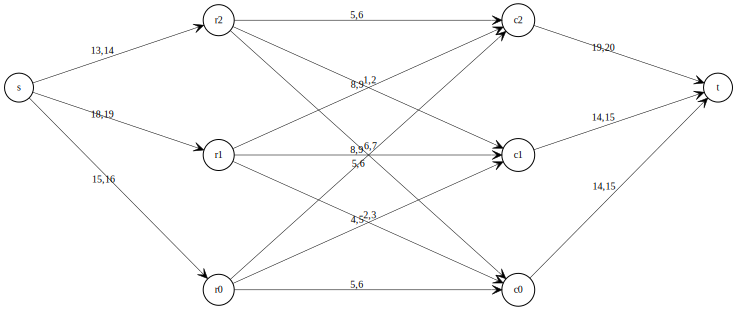

In [ ]:
d = nx.nx_agraph.to_agraph(G)

d.node_attr.update (fontsize='10', width=0.4, shape='circle')

d.edge_attr.update(fontsize='10', arrowhead='vee', penwidth=0.5)
#d.node_attr['shape']='circle

d.draw ('img.svg', prog='neato', args='-n2')

SVG(filename='img.svg')
#Image ('img.png')


### Finding a feasible rounding

**Step 1.** Generate a copy $H$ of the graph $G$

**Remember** The <code>copy()</code> method  makes a complete copy of the graph including all of the node or edge attributes.

In [ ]:
H = G.copy()

**Step 2.** Capacity scaling: capacity of each arc of $H$ is scaled  to $u_{ij} - l_{ij}$ 

In [ ]:
for i,j in H.edges():
    H[i][j]['capacity'] = \
    H[i][j]['ub'] -  H[i][j]['lb']

In [ ]:
print(H.edges(data=True))

[('s', 'r0', {'lb': 15, 'ub': 16, 'xlabel': '15,16', 'capacity': 1}), ('s', 'r1', {'lb': 18, 'ub': 19, 'xlabel': '18,19', 'capacity': 1}), ('s', 'r2', {'lb': 13, 'ub': 14, 'xlabel': '13,14', 'capacity': 1}), ('c0', 't', {'lb': 14, 'ub': 15, 'xlabel': '14,15', 'capacity': 1}), ('c1', 't', {'lb': 14, 'ub': 15, 'xlabel': '14,15', 'capacity': 1}), ('c2', 't', {'lb': 19, 'ub': 20, 'xlabel': '19,20', 'capacity': 1}), ('r0', 'c0', {'lb': 5, 'ub': 6, 'xlabel': '5,6', 'capacity': 1}), ('r0', 'c1', {'lb': 4, 'ub': 5, 'xlabel': '4,5', 'capacity': 1}), ('r0', 'c2', {'lb': 5, 'ub': 6, 'xlabel': '5,6', 'capacity': 1}), ('r1', 'c0', {'lb': 2, 'ub': 3, 'xlabel': '2,3', 'capacity': 1}), ('r1', 'c1', {'lb': 8, 'ub': 9, 'xlabel': '8,9', 'capacity': 1}), ('r1', 'c2', {'lb': 8, 'ub': 9, 'xlabel': '8,9', 'capacity': 1}), ('r2', 'c0', {'lb': 6, 'ub': 7, 'xlabel': '6,7', 'capacity': 1}), ('r2', 'c1', {'lb': 1, 'ub': 2, 'xlabel': '1,2', 'capacity': 1}), ('r2', 'c2', {'lb': 5, 'ub': 6, 'xlabel': '5,6', 'capacit

**Step 3.** Add an arc between $t$ and $s$ with infinite capacity (i.e., a capacity large enough)

**Remark** In this case you can assign to the arc $(t,s)$ a capacity equal to the maximum between $u(\delta^+(s))$ and $u(\delta^-(t))$


In [ ]:
row_cap = 0
for i in noderow:
    row_cap +=  H['s'][i]['ub'] 

col_cap = 0
for i in nodecol:
    col_cap +=  H[i]['t']['ub']

H.add_edge ('t','s',capacity=max(row_cap,col_cap))

**Step 4.** Two extra nodes $s_1$ and $t_1$ are added to $H$

In [ ]:
H.add_node('s1')
H.add_node('t1')

**Step 5.** For each node, the flow unbalance is evaluated

**Remark** Flow unbalance is stored in a dictionary and is evaluated on graph $G$. By constructions, the sum of flow unbalance is equal to 0

In [ ]:
unbalance = {}

for i in G.nodes():
        auxunb = 0
        for j in G.in_edges(i):
            auxunb += G[j[0]][j[1]]['lb']
        
        for j in G.out_edges(i):
            auxunb -= G[j[0]][j[1]]['lb']
        
        unbalance[i] = auxunb
        

print(unbalance)


{'s': -46, 't': 47, 'c0': -1, 'c1': -1, 'c2': -1, 'r0': 1, 'r1': 0, 'r2': 1}


**Step 6.** Two set of arcs are added to $H$:
1. Arcs $(s_1, i)$ if flow unbalance of $i>0$
2. Arcs $(i, t_1)$ if flow unbalance of $i<0$

In [ ]:
for i in unbalance:

    if unbalance[i] > 0:
        H.add_edge ('s1',i,capacity = unbalance[i])
    if unbalance[i] < 0:
        H.add_edge (i,'t1',capacity =- unbalance[i])
        

**Step 7.** Evaluate the maximum $s_1-t_1$ flow

A valid circulation always exists



In [ ]:
value, flow = nx.maximum_flow(H,'s1','t1', 'capacity')

print (value)

for i in H.out_edges('s1'):
    print ("Flow and capacity of arc (%s,%s):" % (i[0],i[1]), H[i[0]][i[1]]['capacity'], flow[i[0]][i[1]])
    if H[i[0]][i[1]]['capacity'] != flow[i[0]][i[1]]:
        print ("Valid circulation not found")
        break

flow

49
Flow and capacity of arc (s1,t): 47 47
Flow and capacity of arc (s1,r0): 1 1
Flow and capacity of arc (s1,r2): 1 1


{'s': {'r0': 1, 'r1': 1, 'r2': 0, 't1': 46},
 't': {'s': 48},
 'c0': {'t': 1, 't1': 1},
 'c1': {'t': 0, 't1': 1},
 'c2': {'t': 0, 't1': 1},
 'r0': {'c0': 1, 'c1': 0, 'c2': 1},
 'r1': {'c0': 0, 'c1': 1, 'c2': 0},
 'r2': {'c0': 1, 'c1': 0, 'c2': 0},
 's1': {'t': 47, 'r0': 1, 'r2': 1},
 't1': {}}

**Step 8.** Print the rounded matrix


In [ ]:
rounded_matrix = []

for i in range(numrows):
    rounded_matrix.append([])
    for j in range(numcols):
        rounded_matrix[i].append(int(math.floor(matrix[i][j])) + \
        flow[noderow[i]][nodecol[j]])

sumroundedcol = [0 for j in range(numcols)]

for j in range(numcols):
    for i in range(numrows):
        sumroundedcol [j] += rounded_matrix [i][j]

sumroundedrow = [0 for i in range(numrows)]

for i in range(numrows):
    for j in range(numcols):
        sumroundedrow [i] += rounded_matrix[i][j]

print ("Original matrix")
table = []
for i in range(numrows):
    newrow = matrix[i][:]
    newrow.insert(0,sumrow[i])
    table.append(newrow)

print (tabulate(table, headers = sumcol, tablefmt="grid"))

print()
print()

print ("Rounded matrix")
table = []
for i in range(numrows):
    newrow = rounded_matrix[i][:]
    newrow.insert(0,sumroundedrow[i])
    table.append(newrow)

print (tabulate(table, headers = sumroundedcol, tablefmt="grid"))

Original matrix
+-------+--------+----------------------+---------+
|       |   14.3 |   14.020000000000001 |   19.23 |
+=======+========+======================+=========+
| 15.78 |   5.71 |                 4.29 |    5.78 |
+-------+--------+----------------------+---------+
| 18.43 |   2.06 |                 8.13 |    8.24 |
+-------+--------+----------------------+---------+
| 13.34 |   6.53 |                 1.6  |    5.21 |
+-------+--------+----------------------+---------+


Rounded matrix
+----+------+------+------+
|    |   15 |   14 |   19 |
+====+======+======+======+
| 16 |    6 |    4 |    6 |
+----+------+------+------+
| 19 |    2 |    9 |    8 |
+----+------+------+------+
| 13 |    7 |    1 |    5 |
+----+------+------+------+
